<a href="https://colab.research.google.com/github/valeriafigueredo-data/Analise_e_visualizacao_dados_cesar_school/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Primeiro Trabalho da Disciplina de Análise e Visualização de Dados**

Professor: Eronides da Silva Neto

Aluno 01: Gabriel De Paula Leite

Aluno 02: Kauã Marques de Barros Silva

Aluno 03: Luiz Sergio Sieber Padilla

Aluno 04: Valéria Cristina A. R. de Figueredo

O objetivo do presente trabalho é realizar visualizações, com Matplotlib ou Seaborn no dataset escolhido (Spotify).


# **Contexto**

Este conjunto de dados fornece detalhes concisos sobre faixas de música e seu desempenho em várias plataformas. Ele inclui informações essenciais como nome da faixa, artista(s), data de lançamento e presença em playlists e paradas populares em plataformas como Spotify, Apple Music, Deezer e Shazam. Além disso, apresenta métricas como BPM, tom, modo, dançabilidade, valência, energia, acústica, instrumentalidade e vivacidade da fala, que oferecem insights sobre as características musicais e o apelo de cada faixa.

**## Dicionário**

- **track_name**: O nome da faixa.
- **artist(s)_name**: O(s) nome(s) do(s) artista(s) que criou(criaram) a faixa.
- **artist_count**: O número de artistas associados à faixa.
- **released_year**: O ano em que a faixa foi lançada.
- **released_month**: O mês em que a faixa foi lançada.
- **released_day**: O dia em que a faixa foi lançada.
- **in_spotify_playlists**: Indica se a faixa está incluída em playlists do Spotify.
- **in_spotify_charts**: Indica se a faixa está presente nos charts do Spotify.
- **streams**: O número total de streams que a faixa acumulou.
- **in_apple_playlists**: Indica se a faixa está incluída em playlists da Apple Music.
- **in_apple_charts**: Indica se a faixa está presente nos charts da Apple Music.
- **in_deezer_playlists**: Indica se a faixa está incluída em playlists da Deezer.
- **in_deezer_charts**: Indica se a faixa está presente nos charts da Deezer.
- **in_shazam_charts**: Indica se a faixa está presente nos charts do Shazam.
- **bpm**: Batidas por minuto - uma medida de tempo na música.
- **key**: A tonalidade musical na qual a faixa é composta.
- **mode**: Indica se a faixa está em tom maior ou menor.
- **danceability_**: Uma medida de quão adequada é a faixa para dançar.
- **valence_**: A positividade musical transmitida por uma faixa.
- **energy_**: A energia percebida de uma faixa.
- **acousticness_**: Uma medida de quão acústica é uma faixa.
- **instrumentalness_**: Uma medida de se a faixa contém vocais.
- **liveness_**: Uma medida da presença de elementos ao vivo em uma faixa.
- **speechiness_**: Uma medida da presença de palavras faladas em uma faixa.


**Fonte:** https://www.kaggle.com/datasets/zeesolver/spotfy

**ATUALIZAÇÃO DO DATASET:** maio, 2024


# **1. Bibliotecas**

In [62]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import requests
from io import BytesIO

# **2. Dataframe**

In [63]:
url = 'https://raw.githubusercontent.com/valeriafigueredo-data/Analise_e_visualizacao_dados_cesar_school/main/pandas/Popular_Spotify_Songs.csv'
stf = pd.read_csv(url, encoding='latin1')

# **3. ANÁLISE EXPLORATÓRIA**

In [64]:
stf.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [65]:
stf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [66]:
stf['streams'].describe()

,streams
count,953
unique,949
top,723894473
freq,2


**Problemas observados:**
- Coluna Streams, in_shazam_charts e in_deezer_playlist como Objetct
- in_shazam_charts e Key com menos de 953 linhas

# **4. LIMPEZA DOS DADOS**

In [67]:
# Função para verificar se é um dígito
def is_digit(value):
    return str(value).isdigit()

# Função para remover valores não numéricos e converter para int
def clean_and_convert(df, column_names):
    for column in column_names:
        mask = df[column].apply(is_digit)  # Criando a máscara booleana com o filtro
        df = df[mask]  # Aplicando a máscara no dataset
        df[column] = df[column].astype(int)  # Convertendo os dados para int
    return df

# Lista de colunas a serem limpas e convertidas
columns_to_clean = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Aplicar a função de limpeza e conversão
stf = clean_and_convert(stf, columns_to_clean)

stf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            829 non-null    object
 1   artist(s)_name        829 non-null    object
 2   artist_count          829 non-null    int64 
 3   released_year         829 non-null    int64 
 4   released_month        829 non-null    int64 
 5   released_day          829 non-null    int64 
 6   in_spotify_playlists  829 non-null    int64 
 7   in_spotify_charts     829 non-null    int64 
 8   streams               829 non-null    int64 
 9   in_apple_playlists    829 non-null    int64 
 10  in_apple_charts       829 non-null    int64 
 11  in_deezer_playlists   829 non-null    int64 
 12  in_deezer_charts      829 non-null    int64 
 13  in_shazam_charts      829 non-null    int64 
 14  bpm                   829 non-null    int64 
 15  key                   748 non-null    object


<ipython-input-67-0bee15deea11>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)  # Convertendo os dados para int


In [68]:
stf['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', 'G#', 'G', nan, 'E', 'A#', 'D#'],
      dtype=object)

**CONCLUSÃO**

Dentre os valores únicos, um dos valores está nulo, e o único valor não citado na lista dos tons foi C (Dó).

Foi realizada uma verificação externa a fim de verificar da lista dos nan se os tons dessas músicas são C. Entretanto, não foi possível observar tal fato, de modo que os dados nulos não foram convertidos para não gerar viéses.

In [69]:
mask_key = stf['key'].isna()
stf[mask_key]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,...,120,NaN,Major,81,63,68,11,0,11,4
46,I Ain't Worried,OneRepublic,1,2022,5,13,8431,76,1085685420,241,...,140,NaN,Major,71,82,81,11,0,6,5
58,S91,Karol G,1,2023,7,14,525,41,16011326,34,...,128,NaN,Minor,86,42,72,59,0,9,19
59,cardigan,Taylor Swift,1,2020,7,24,7923,29,812019557,106,...,130,NaN,Minor,61,53,58,55,0,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Hold Me Closer,"Elton John, Britney Spears",2,2017,11,10,4967,0,284216603,165,...,126,NaN,Major,67,49,77,11,0,19,11
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,...,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,244585109,102,...,137,NaN,Major,74,71,89,24,61,15,5
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,110,NaN,Major,48,15,31,80,22,12,4


**CONCLUSÃO:** Portanto, após a análise, foi possivel verificar que cada uma dessas musicas tem um tom diferente, sendo assim, essa informação não terá como ser definida, como dito anteriormente.



In [70]:
stf['key'] = stf['key'].fillna('Desconhecido')
stf['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', 'G#', 'G', 'Desconhecido', 'E',
       'A#', 'D#'], dtype=object)

In [71]:
#Emergênciais
stf['track_name'] = stf['track_name'].replace('Sunflower - Spider-Man: Into the Spider-Verse', 'Sunflower', regex=False)
stf['artist(s)_name'] = stf['artist(s)_name'].replace('Post Malone, Swae Lee', 'Post Malone', regex=False)
stf.loc[41, 'artist_count'] = 1

## **5. VISUALIZAÇÕES**

**5.1 GRÁFICO DE BARRAS HORIZONTAIS - (TOP 5 DOS ARTISTAS MAIS OUVIDOS)**

O objetivo desse gráfico de barras horizontais é demonstrar os cinco cantores  mais ouvidos, reproduzidos nesse dataframe.

In [72]:
popular_artist = stf.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(5)
popular_artist_bi = popular_artist/1000000000
popular_artist_bi

,streams
artist(s)_name,
Taylor Swift,12.939819
Bad Bunny,9.997800
The Weeknd,7.867833
Harry Styles,6.772877
Post Malone,5.128039


In [73]:
stf['artist(s)_name'] = stf['artist(s)_name'].replace('Mï¿½ï¿½ne', 'Maneskin', regex=False)

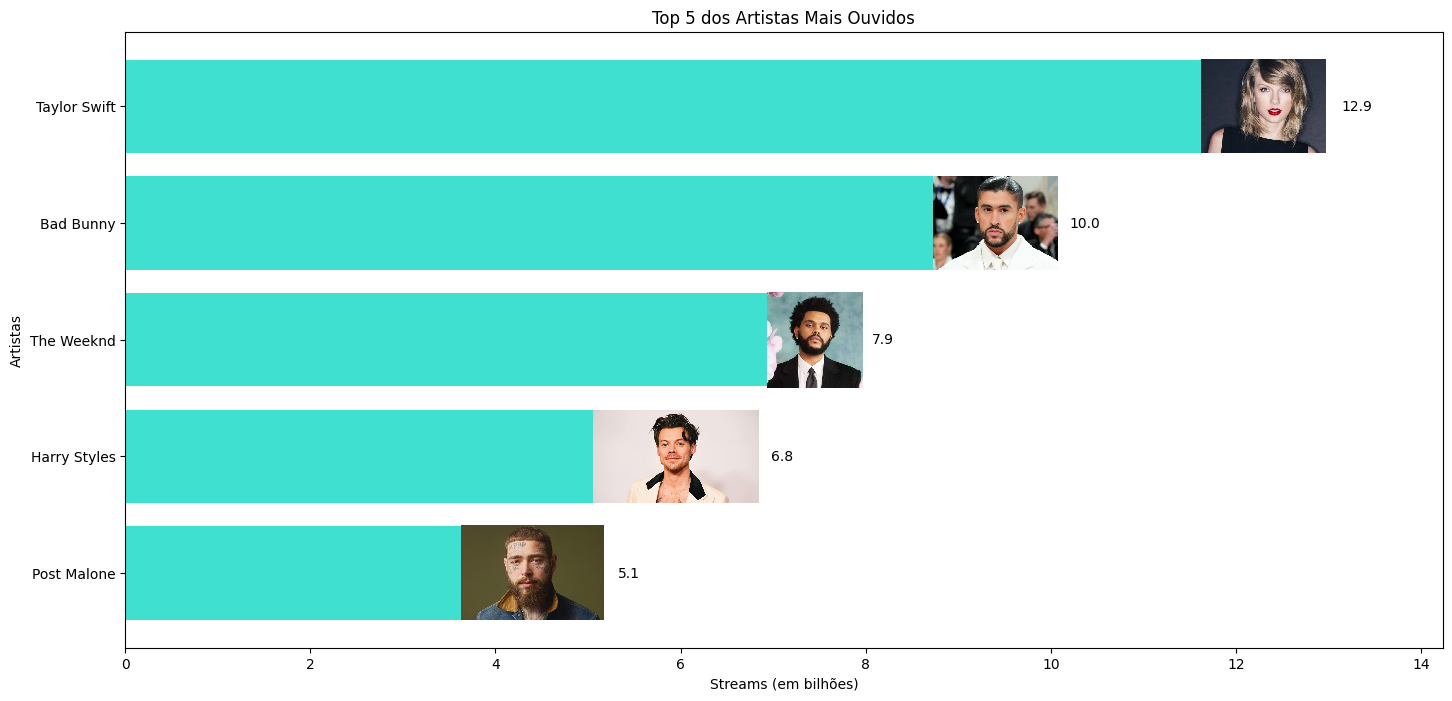

In [74]:
# Função para carregar e redimensionar imagem com tratamento de erro
def load_and_resize_image(url, zoom):
    try:
        response = requests.get(url, timeout=10)  # Adiciona timeout para evitar bloqueios longos
        response.raise_for_status()  # Levanta um erro para status HTTP 4xx/5xx
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')  # Garantir que a imagem está no formato RGB
        image = np.asarray(img)
        return OffsetImage(image, zoom=zoom)
    except requests.RequestException as e:
        print(f"Erro ao carregar a imagem de {url}: {e}")
        # Retornar uma imagem padrão em caso de erro, se desejado
        return OffsetImage(np.zeros((10, 10, 3)), zoom=zoom)  # Imagem padrão (preta) como fallback

# Criando o gráfico
plt.figure(figsize=(17, 8))
bars = plt.barh(popular_artist_bi.index, popular_artist_bi.values, color='Turquoise')
plt.xlabel('Streams (em bilhões)')
plt.ylabel('Artistas')
plt.title('Top 5 dos Artistas Mais Ouvidos')
plt.gca().invert_yaxis()  # Inverter a ordem dos artistas para que o maior esteja no topo

# Adicionar imagem da Taylor Swift
url_swift = 'https://extra.globo.com/incoming/14772782-3f0-a10/w448/cabelo-taylor-swift01.jpg'
imagebox_swift = load_and_resize_image(url_swift, zoom=0.2)
ab_swift = AnnotationBbox(imagebox_swift, (12.3, 0), frameon=False)  # Ajustar coordenadas conforme necessário
plt.gca().add_artist(ab_swift)

# Adicionar imagem do Bad Bunny
url_bunny = 'https://p2.trrsf.com/image/fget/cf/1200/900/middle/images.terra.com/2024/03/15/1424097963-4462619-bad-bunny-da-origem-do-nome-ao-namoro-c-1400x823-3.png'
imagebox_bunny = load_and_resize_image(url_bunny, zoom=0.075)
ab_bunny = AnnotationBbox(imagebox_bunny, (9.4, 1), frameon=False)  # Ajustar coordenadas conforme necessário
plt.gca().add_artist(ab_bunny)

# Adicionar imagem do The Weeknd
url_weeknd = 'https://midias.correiobraziliense.com.br/_midias/jpg/2021/06/30/1000x1000/1_the_weeknd_desenvolve_serie_para_a_hbo_em_parceria_com_o_criador_de_euphoria-6735943.jpg?20220427162337?20220427162337'
imagebox_weeknd = load_and_resize_image(url_weeknd, zoom=0.069)
ab_weeknd = AnnotationBbox(imagebox_weeknd, (7.45, 2), frameon=False)  # Ajustar coordenadas conforme necessário
plt.gca().add_artist(ab_weeknd)

# Adicionar imagem do Harry Styles
url_styles = 'https://assets.teenvogue.com/photos/65a6d2849efb8ab437bb31e9/16:9/w_2560%2Cc_limit/GettyImages-1246836753%2520(1).jpg'
imagebox_styles = load_and_resize_image(url_styles, zoom=0.0465)
ab_styles = AnnotationBbox(imagebox_styles, (5.95, 3), frameon=False)  # Ajustar coordenadas conforme necessário
plt.gca().add_artist(ab_styles)

# Adicionar imagem do Post Malone
url_malone = 'https://akamai.sscdn.co/uploadfile/letras/fotos/b/5/1/2/b512f42e78de2386852f46fa14111955.jpg'
imagebox_malone = load_and_resize_image(url_malone, zoom=0.1)
ab_malone = AnnotationBbox(imagebox_malone, (4.4, 4), frameon=False)  # Ajustar coordenadas conforme necessário
plt.gca().add_artist(ab_malone)

# Adicionar rótulos aos gráficos de barras
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.1f}', va='center')

# Ajustar os limites do eixo x para dar mais espaço aos rótulos
plt.xlim(0, max(popular_artist_bi.values) * 1.1)

# Mostrar o gráfico
plt.show()



**5.2 GRÁFICO DE BARRAS VERTICAIS- (TOP 5 DAS MÚSICAS MAIS OUVIDOS)**

O objetivo desse gráfico de barras verticais é demonstrar as cinco músicas mais ouvidas, reproduzidos nesse dataframe.

In [75]:
popular_songs = stf.groupby('track_name')['streams'].sum().sort_values(ascending=False).head(5)
popular_songs_bi = popular_songs/1000000000
popular_songs_bi

,streams
track_name,
Sunflower,2.808097
STAY (with Justin Bieber),2.665344
Lucid Dreams,2.288695
Circles,2.132336
Die For You,1.894380


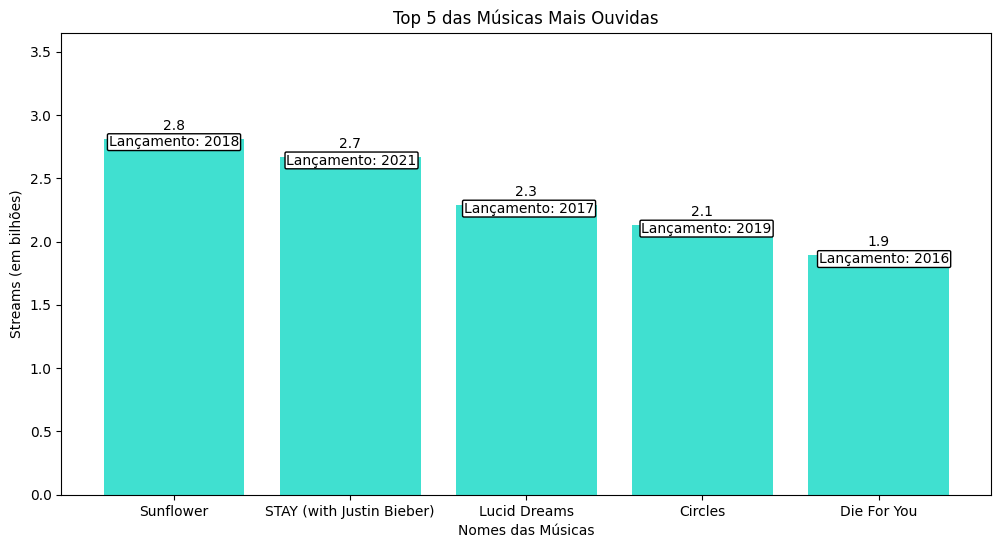

In [76]:
plt.figure(figsize=(12, 6))
bars = plt.bar(popular_songs_bi.index, popular_songs_bi.values, color='Turquoise')
plt.xlabel('Nomes das Músicas')
plt.ylabel('Streams (em bilhões)')
plt.title('Top 5 das Músicas Mais Ouvidas')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
         f'{bar.get_height():,.1f}', ha='center', va='bottom')

# Adicionando anotações de lançamento
anos = [2018,2021,2017,2019, 2016]
# Adicionar anotações com os anos
for i, bar in enumerate(bars):
    plt.annotate(f'Lançamento: {anos[i]}',
                 xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2),
                 textcoords='offset points',
ha='center',
                 va='top',
                 fontsize=10,
                 color='black',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1'))



plt.ylim(0, max(popular_songs_bi.values) * 1.3)  # Ajuste dos limites do eixo x para dar mais espaço aos rótulos

plt.show()

**5.3 MAPA DE CALOR DE CORRELAÇÃO - HEATMAP - (STREAMS E PLAYLISTS NAS PLATAFORMAS)**

O objetivo desse mapa de calor de correlação, heatmap é demonstrar a correlação entre as variaveis streams e as playlists das plataformas spotify, apple e deezer.

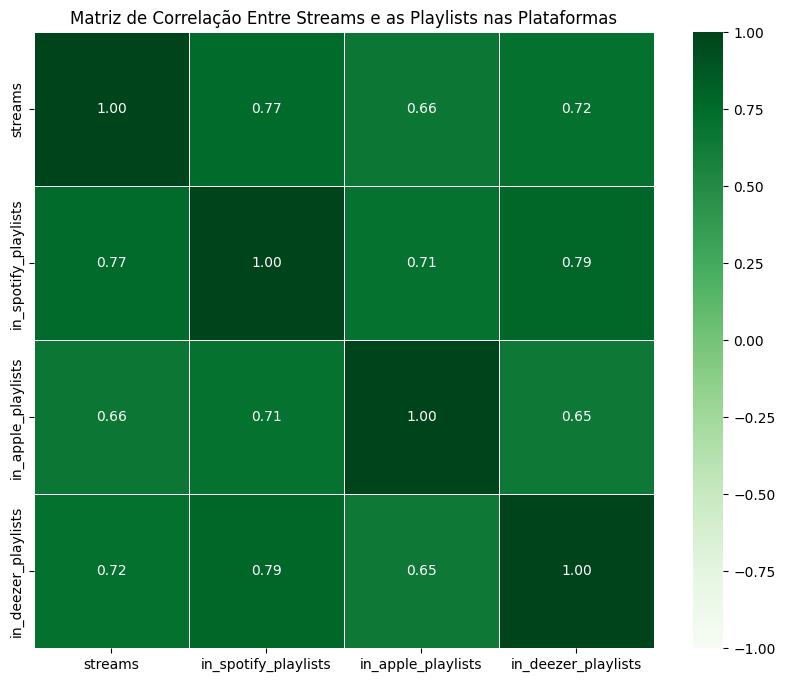

In [77]:
# Seleção das colunas relevantes
columns_of_interest = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
stf_subset = stf[columns_of_interest]

# Calculo da matriz de correlação
correlation_matrix = stf_subset.corr()

# Configuração do tamanho da figura
plt.figure(figsize=(10, 8))

# Criação o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap= 'Greens', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Adição do título
plt.title('Matriz de Correlação Entre Streams e as Playlists nas Plataformas')
plt.show()

**5.4 GRÁFICO DE RADAR - (MÉDIA DOS ATRIBUTOS DAS 5 MÚSICAS MAIS OUVIDAS)**

O gráfico de Radar busca determinar a média dos atributos das 5 músicas mais ouvidas.

In [78]:
stf.rename(columns={
    'danceability_%': 'Dançabilidade',
    'valence_%': 'Euforia',
    'energy_%': 'Energia',
    'acousticness_%': 'Acustica',
    'instrumentalness_%': 'Vocais',
    'liveness_%': 'Ao vivo',
    'speechiness_%': 'Nº de Palavras'
}, inplace=True)

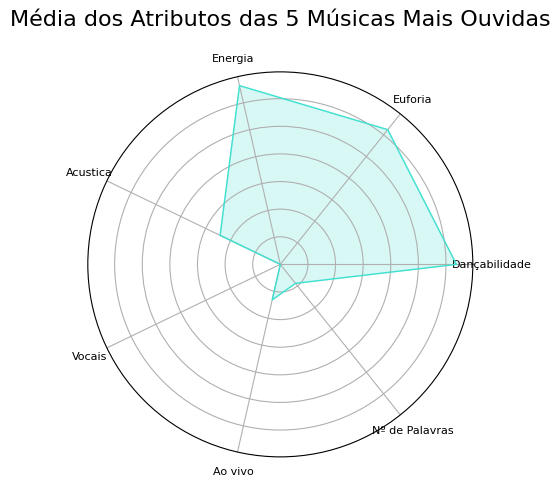

In [79]:
# Seleção das 5 músicas com maior número de streams
top_5_songs = stf.nlargest(5, 'streams')

# Calculo dos valores médios para os parâmetros desejados
params = ['Dançabilidade', 'Euforia', 'Energia', 'Acustica', 'Vocais', 'Ao vivo', 'Nº de Palavras']
values = top_5_songs[params].mean().tolist()

# Número de variáveis
num_vars = len(params)

# Ângulo de cada variável
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

# Inicializando o plot
fig, ax = plt.subplots(figsize=(10,5), subplot_kw=dict(polar=True))

# Desenhando uma linha no gráfico de radar
ax.fill(angles, values, color='Turquoise', alpha=0.20)
ax.plot(angles, values, color='Turquoise', linewidth=1)

# Adicionando rótulos para cada ponto de dados
ax.set_yticklabels([])  # Removendo rótulos de y
ax.set_xticks(angles[:-1])
ax.set_xticklabels(params, fontsize=8)

# Adicionando um título
plt.title('Média dos Atributos das 5 Músicas Mais Ouvidas', size=16, color='black', y=1.1)

# Mostrando o gráfico
plt.show()

**5.5 GRÁFICO DE BOXPLOT - (BPM DAS MÚSICAS)**

O gráfico de Boxplot busca determinar os seguintes elementos da variável BPM (Batida por Minuto) das músicas: limite inferior (mínimo), limite superior(máximo), primeiro quartil, segundo quartil e terceiro quartil.

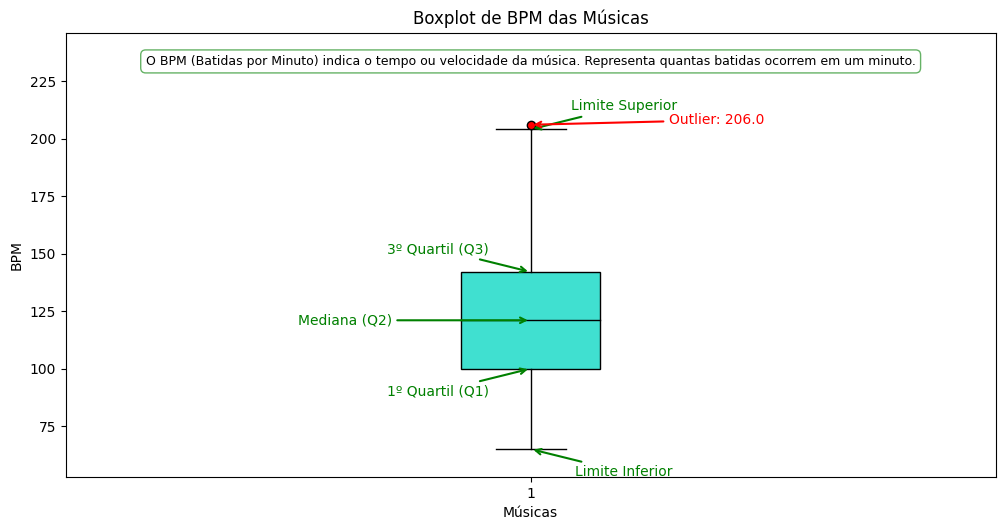

In [80]:
plt.figure(figsize=(12, 6))

# Criando o boxplot

box = plt.boxplot(stf['bpm'], patch_artist=True, boxprops=dict(facecolor='Turquoise', color='black'),
                   medianprops=dict(color='black'), flierprops=dict(markerfacecolor='red', marker='o'))

# Adicionando o título, rótulos dos eixos e o texto de anotação
plt.title('Boxplot de BPM das Músicas')

plt.xlabel('Músicas')
plt.ylabel('BPM')

# Texto da anotação
texto_anotacao = ("O BPM (Batidas por Minuto) indica o tempo ou velocidade da música. "
                  "Representa quantas batidas ocorrem em um minuto.")

# Ajuste para posicionar a anotação dentro da área do gráfico
plt.text(0.5, 0.95, texto_anotacao, fontsize=9, transform=plt.gca().transAxes, va='top', ha='center',
         bbox=dict(boxstyle='round,pad=0.4', edgecolor='green', facecolor='white', alpha=0.6))

# Ajustar a posição do título e o layout do gráfico
plt.subplots_adjust(top=0.90)

# Ajustar os limites do eixo y para acomodar o texto
plt.ylim(stf['bpm'].min() - 12, stf['bpm'].max() + 40)

# Ajustar a posição do título e o layout do gráfico
plt.subplots_adjust(top=0.85)

 # Coletar os valores do boxplot
# Para isso, precisamos calcular a partir dos dados
data_values = stf['bpm']
Q1 = np.percentile(data_values, 25)
Q3 = np.percentile(data_values, 75)
median = np.median(data_values)
lower_whisker = np.min(data_values[data_values >= (Q1 - 1.5 * (Q3 - Q1))])
upper_whisker = np.max(data_values[data_values <= (Q3 + 1.5 * (Q3 - Q1))])
outliers = data_values[(data_values < lower_whisker) | (data_values > upper_whisker)]

# Adicionar setas e textos explicativos
plt.annotate('Limite Inferior', xy=(1, lower_whisker),
             xytext=(1.1, lower_whisker - 10),
             arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='->', lw=1.5),
             fontsize=10, color='green', ha='center', va='center')
plt.annotate('Limite Superior', xy=(1, upper_whisker),
             xytext=(1.1, upper_whisker + 10),
             arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='->', lw=1.5),
             fontsize=10, color='green', ha='center', va='center')
plt.annotate('1º Quartil (Q1)', xy=(1, Q1),
             xytext=(0.9, Q1 - 10),
             arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='->', lw=1.5),
             fontsize=10, color='green', ha='center', va='center')
plt.annotate('3º Quartil (Q3)', xy=(1, Q3),
             xytext=(0.9, Q3 + 10),
             arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='->', lw=1.5),
             fontsize=10, color='green', ha='center', va='center')
plt.annotate('Mediana (Q2)', xy=(1, median),
             xytext=(0.8, median),
             arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='->', lw=1.5),
             fontsize=10, color='green', ha='center', va='center')

# Destacar outliers
for outlier in outliers:
    plt.annotate(f'Outlier: {outlier:.1f}',
                 xy=(1, outlier),
                 xytext=(1.2, outlier + 2),
                 arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=1.5),
                 fontsize=10, color='red', ha='center', va='center')

plt.show()